### Import packages

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

### Defining the datasets subdivisions

In [13]:
X, y = make_classification(n_samples=9000,
                           n_features=18,
                           n_informative=4,
                           n_redundant=12,
                           random_state=4 )

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3)

In [14]:
train_score, test_score = list(), list()
values = [i for i in range(1, 21)]

for i in values:
  ## model classifier
  model = DecisionTreeClassifier(max_depth=i)
  model.fit( X_train, y_train )

  ## train predictions
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)

  ## test predictions
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)

  ## save the scores
  train_score.append(train_acc)
  test_score.append(test_acc)

  print('>%d, train: %.3f, test: %.3f' %(i, train_acc, train_acc))

>1, train: 0.838, test: 0.838
>2, train: 0.855, test: 0.855
>3, train: 0.872, test: 0.872
>4, train: 0.897, test: 0.897
>5, train: 0.908, test: 0.908
>6, train: 0.926, test: 0.926
>7, train: 0.953, test: 0.953
>8, train: 0.967, test: 0.967
>9, train: 0.974, test: 0.974
>10, train: 0.978, test: 0.978
>11, train: 0.985, test: 0.985
>12, train: 0.990, test: 0.990
>13, train: 0.993, test: 0.993
>14, train: 0.995, test: 0.995
>15, train: 0.997, test: 0.997
>16, train: 0.997, test: 0.997
>17, train: 0.999, test: 0.999
>18, train: 0.999, test: 0.999
>19, train: 0.999, test: 0.999
>20, train: 1.000, test: 1.000


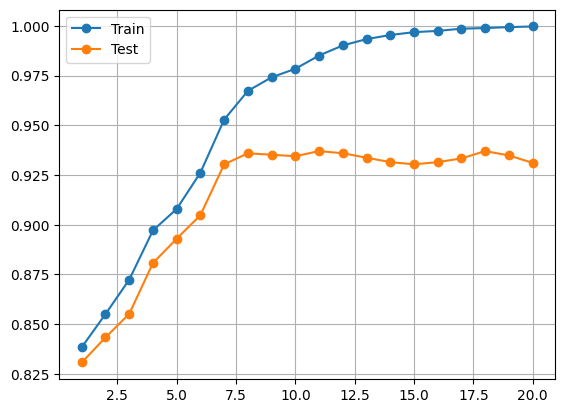

In [16]:
pyplot.plot(values, train_score, '-o', label='Train')
pyplot.plot(values, test_score, '-o', label='Test')
pyplot.legend()
pyplot.grid()
pyplot.show()

### Identifying overfitting and underfitting

In [18]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[2, 4, 6, 10, 20], 'min_samples_split':[5, 10, 20, 50, 100]}
clf = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [25]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

In [23]:
print(accuracy_score( y_train, clf.best_estimator_.predict(X_train) ))
print(accuracy_score( y_test, clf.best_estimator_.predict(X_test) ))

0.9885714285714285
0.9388888888888889
